In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('../input/cybersecurity_attacks.csv', parse_dates=['Timestamp'], dtype={'Protocol':'category', 'Packet Type':'category', 'Traffic Type':'category', 'Attack Type':'category', 'Attack Signature':'category', 'Action Taken':'category', 'Severity Level':'category', 'Network Segment':'category', 'Log Source':'category'}).drop(columns=['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  category      
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  category      
 8   Traffic Type            40000 non-null  category      
 9   Payload Data            40000 non-null  object        
 10  Anomaly Scores          40000 non-null  float64       
 11  Attack Type             40000 non-null  category      
 12  Attack Signature        40000 non-null  catego

# EDA

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",Firewall


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,40000.0,32970.356450,18560.425604,1027.0,16850.75,32856.000,48928.25,65530.0
Destination Port,40000.0,33150.868650,18574.668842,1024.0,17094.75,33004.500,49287.00,65535.0
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0


<AxesSubplot:title={'center':'Timestamp cyber attack by year'}, xlabel='Timestamp'>

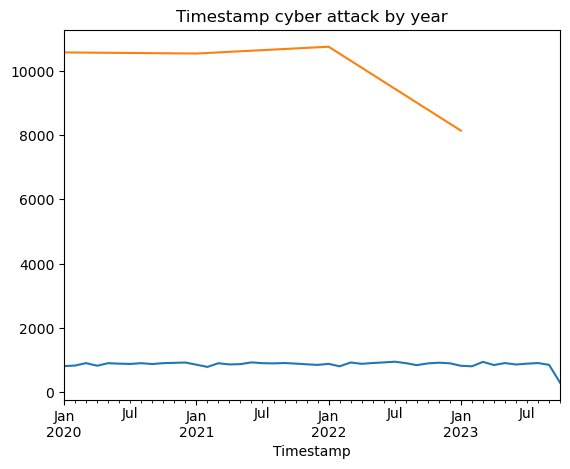

In [6]:
df.resample('M', on='Timestamp')['Attack Type'].count().plot(title='Timestamp cyber attack by month')

df.resample('Y', on='Timestamp')['Attack Type'].count().plot(title='Timestamp cyber attack by year')

In [7]:
data = pd.crosstab(df['Timestamp'], df['Attack Type']).resample('M').count().melt(ignore_index=False)

In [8]:
df.groupby(df['Timestamp'].dt.time).agg({'Attack Type':'count'}).nlargest(10, 'Attack Type')

,Attack Type
Timestamp,
00:56:06,5
02:24:56,5
02:53:42,5
05:31:26,5
05:40:36,5
06:47:06,5
07:26:03,5
12:57:32,5
15:43:03,5


In [9]:
df.groupby('Attack Type')['Anomaly Scores'].mean().reset_index()

,Attack Type,Anomaly Scores
0,DDoS,50.235063
1,Intrusion,49.978029
2,Malware,50.125794


In [10]:
pd.crosstab(df['Geo-location Data'], df['Attack Type']).nlargest(5, columns='DDoS')['DDoS']

Geo-location Data
Erode, Uttar Pradesh    7
Fatehpur, Gujarat       7
Hospet, Karnataka       7
Junagadh, Telangana     7
Kochi, Tamil Nadu       7
Name: DDoS, dtype: int64

In [11]:
pd.crosstab(df['Geo-location Data'], df['Attack Type']).nlargest(5, columns='Malware')['Malware']

Geo-location Data
Aligarh, Chhattisgarh             9
Aurangabad, Nagaland              9
Jalgaon, Mizoram                  8
Yamunanagar, Arunachal Pradesh    8
Bettiah, Chhattisgarh             7
Name: Malware, dtype: int64

In [12]:
pd.crosstab(df['Geo-location Data'], df['Attack Type']).nlargest(5, columns='Intrusion')['Intrusion']

Geo-location Data
Ghaziabad, Jharkhand       10
Amroha, Sikkim              8
Panvel, Jharkhand           8
Rampur, Gujarat             8
Srikakulam, Uttarakhand     8
Name: Intrusion, dtype: int64